In [1]:
# loading the needed libraryies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## loading the data and data cleaning

In [2]:
# loading the dataset
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [4]:
# Showing the statistical Descriptions of all columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [5]:
#check for missing values
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [6]:
# counting values of the target
df['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [7]:
# check for duplicates
df.duplicated().value_counts()

False    918
True     272
Name: count, dtype: int64

In [8]:
# removing duplicates rows from the dataset
df = df.drop_duplicates()

In [9]:
df.duplicated().value_counts()

False    918
Name: count, dtype: int64

In [10]:
# counting values of the target after dropping the dublicate rows
df['target'].value_counts()

target
1    508
0    410
Name: count, dtype: int64

## data visualization

Text(0.5, 1.0, 'Correlation Heatmap')

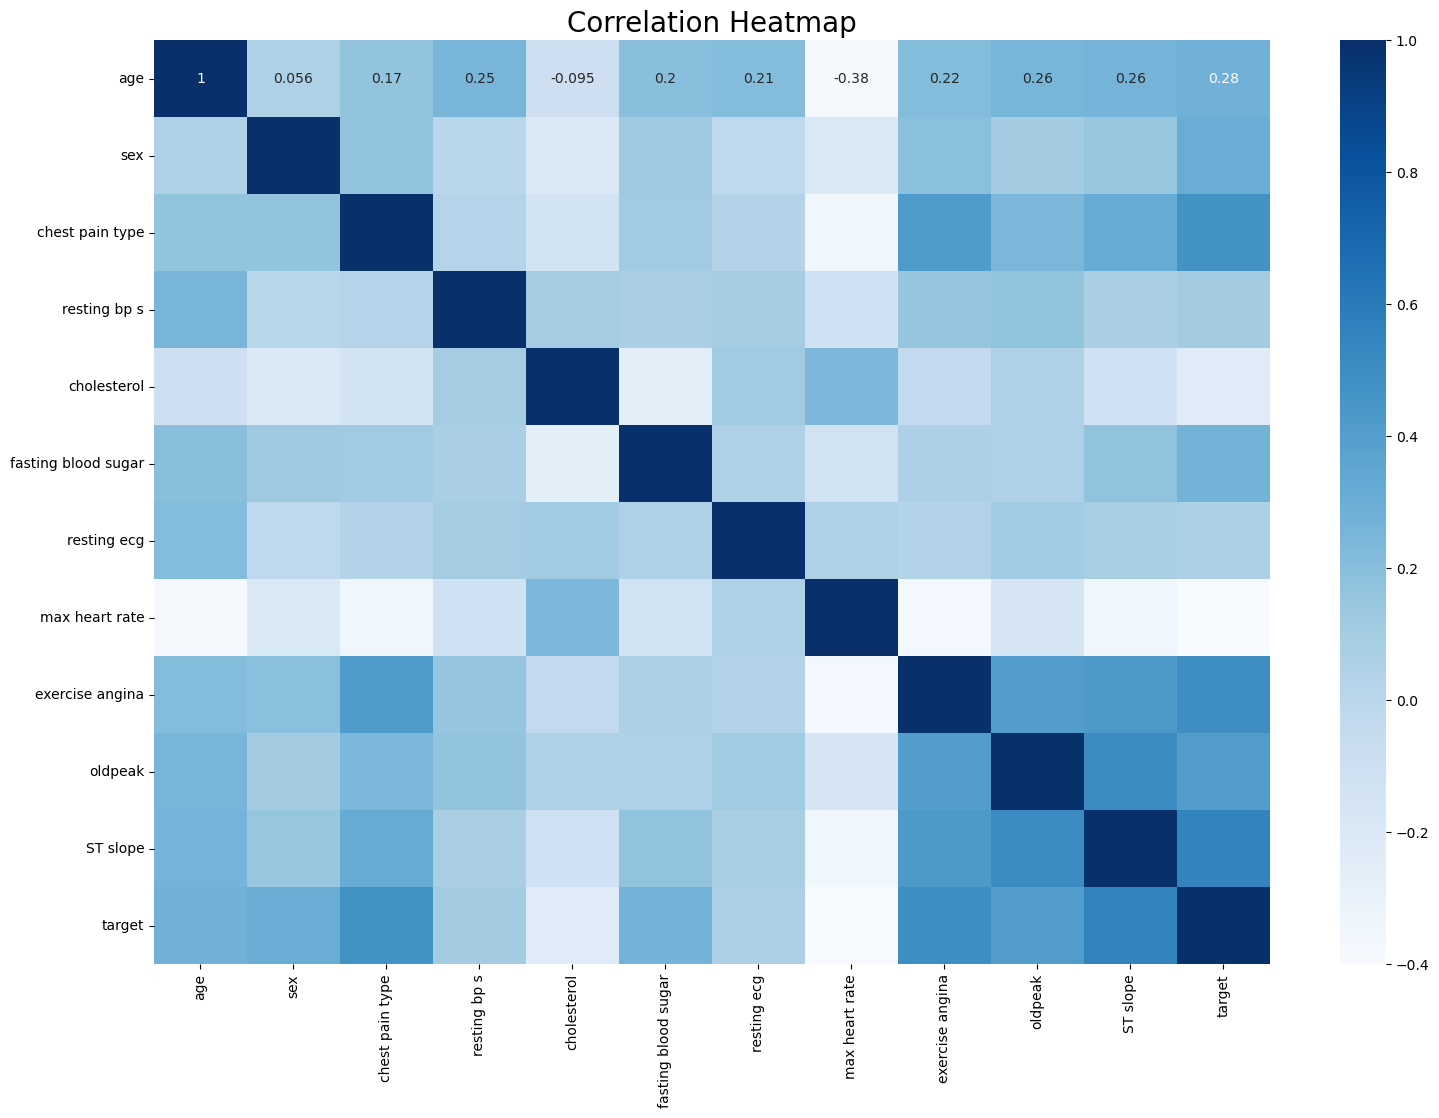

In [13]:
corr=df.corr(numeric_only=True)

plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=20)

E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


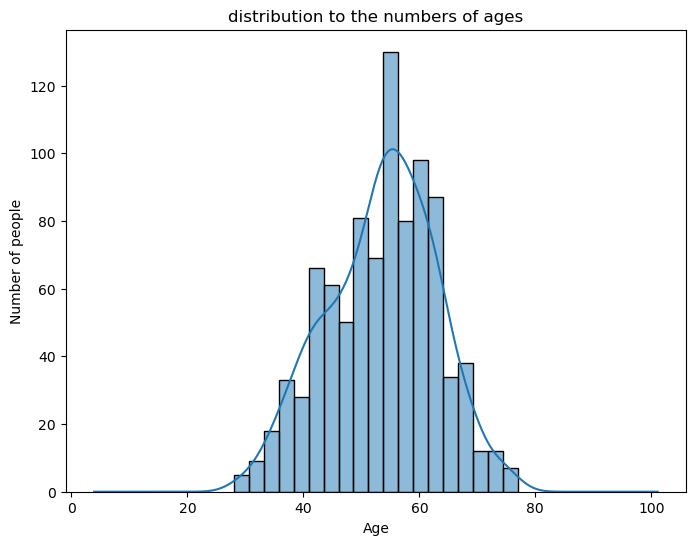

In [14]:
# Distribution of the target variable
plt.figure(figsize=(8,6))
sns.histplot(df['age'], kde = True, kde_kws=dict(cut = 10))
plt.title('distribution to the numbers of ages')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

E:\progs\anaconda\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

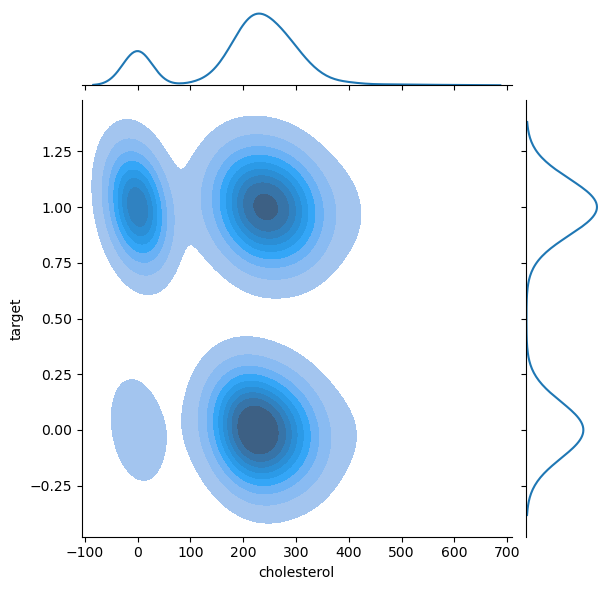

In [15]:
sns.jointplot(x='cholesterol', y='target', data=df, kind='kde', shade= True)

E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='max heart rate'>

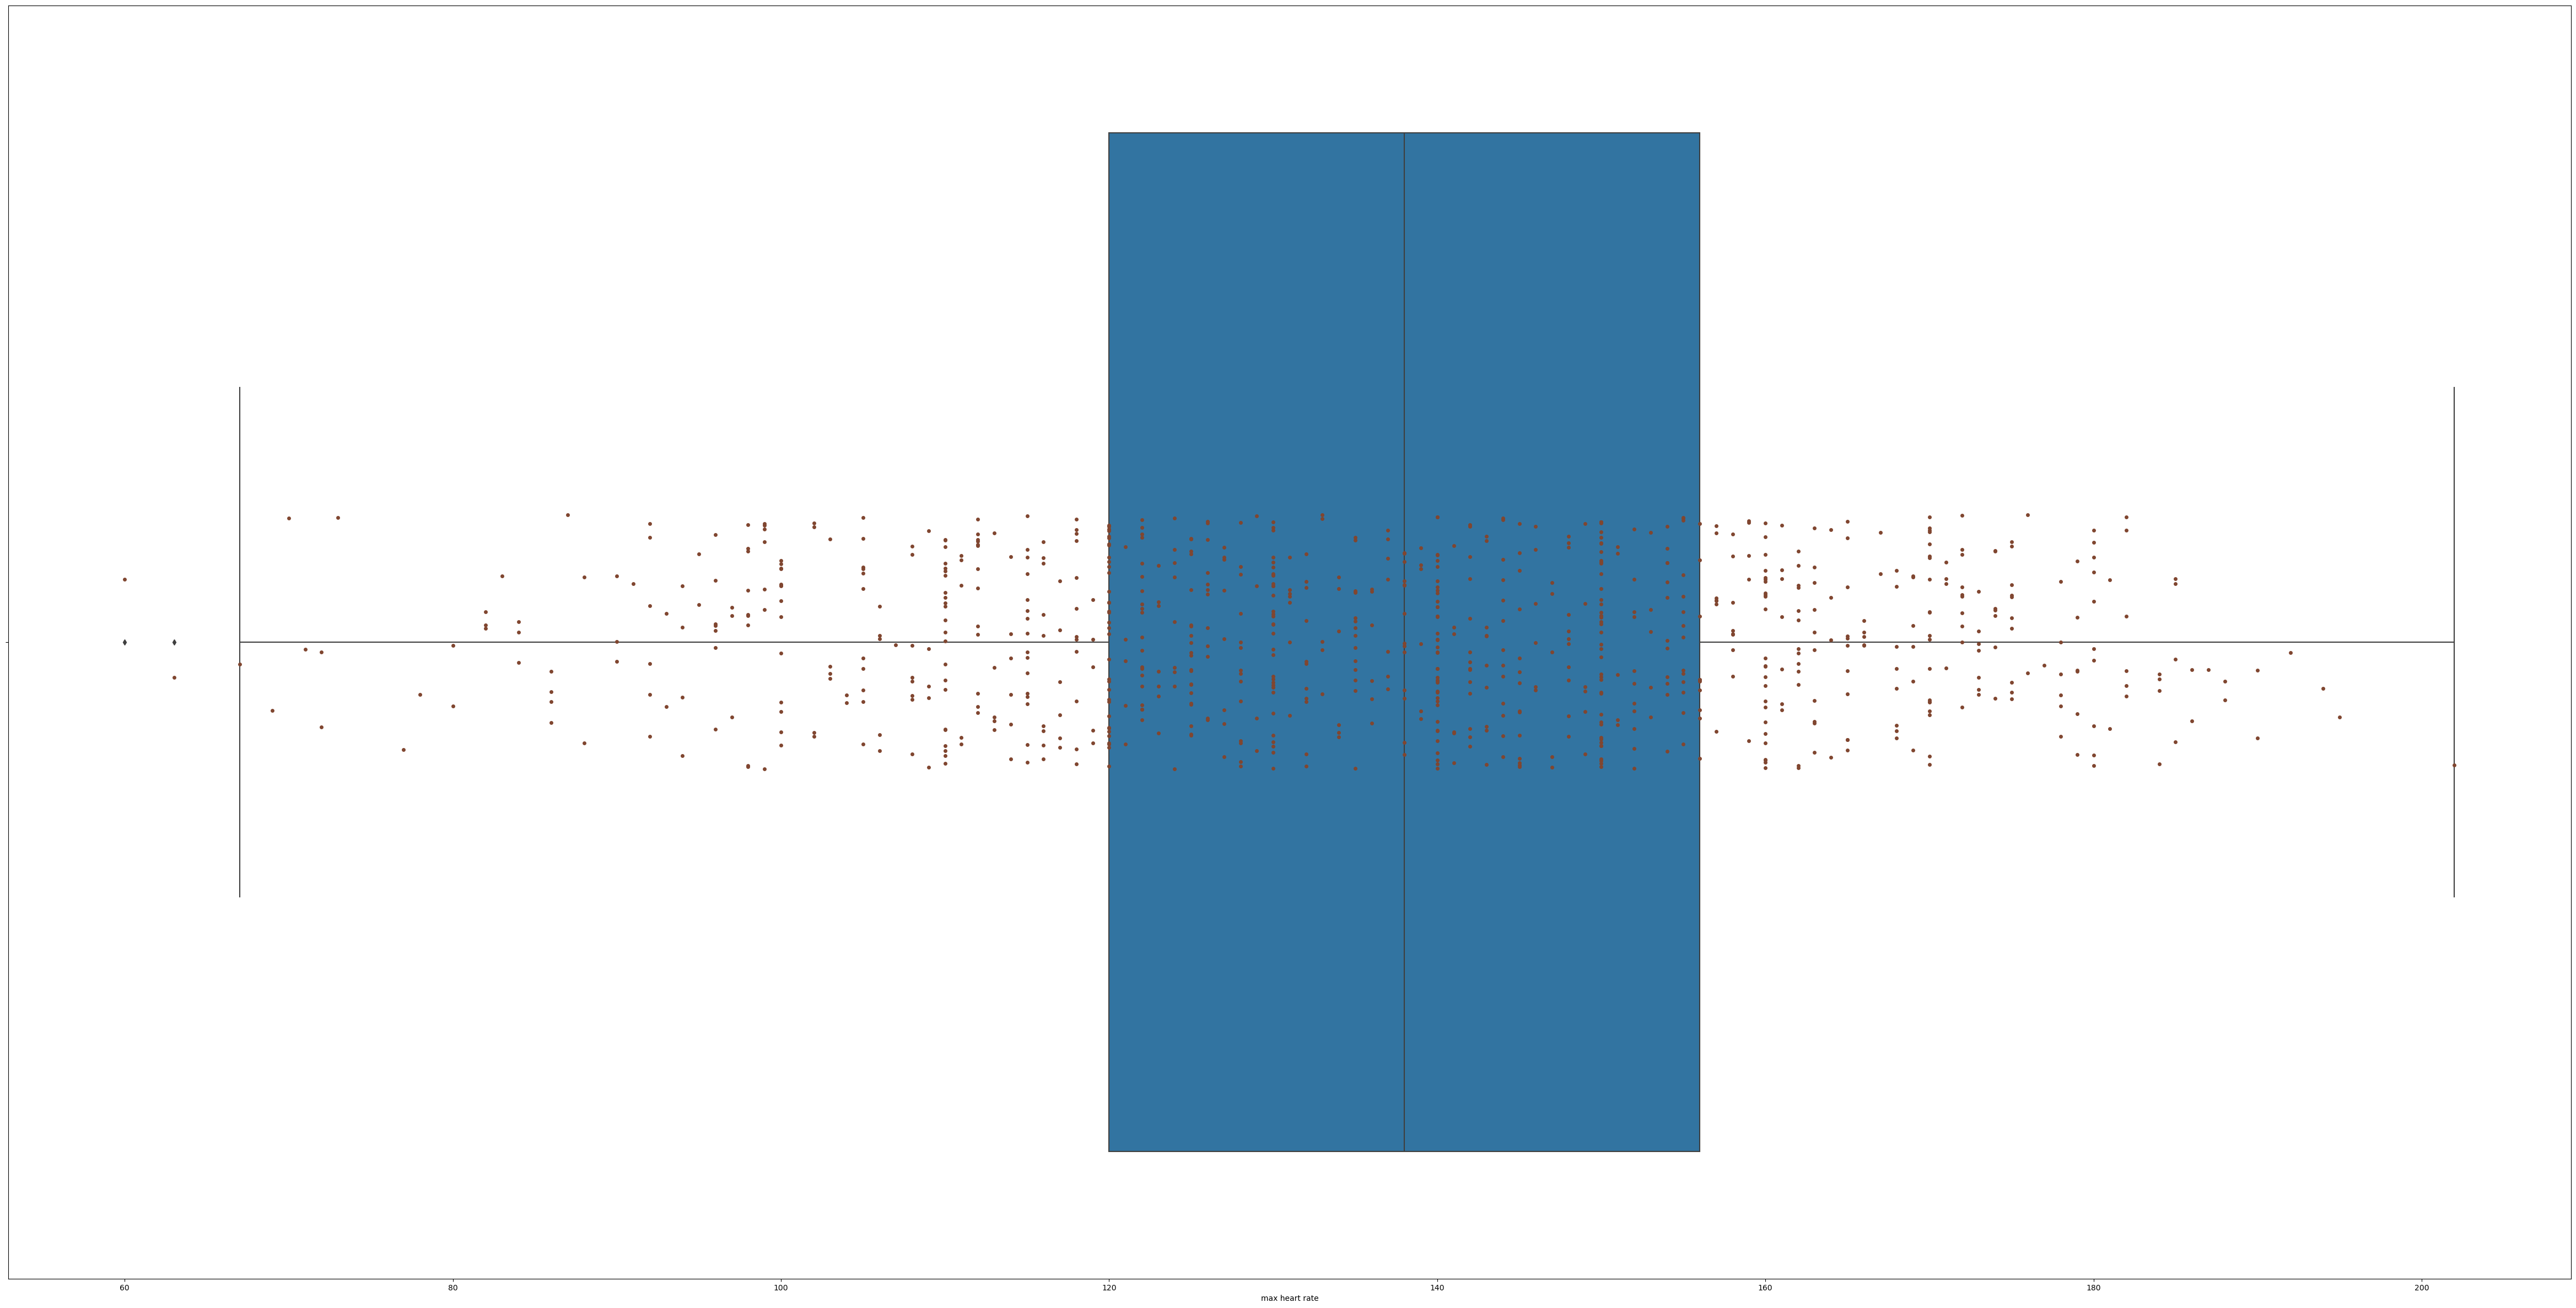

In [16]:
# cheaking the outliers in the feature 'max heart rate'
plt.figure(figsize = (60,30))
sns.boxplot(x='max heart rate', data=df)
sns.stripplot(x='max heart rate', data=df, color="#804630")

E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='oldpeak'>

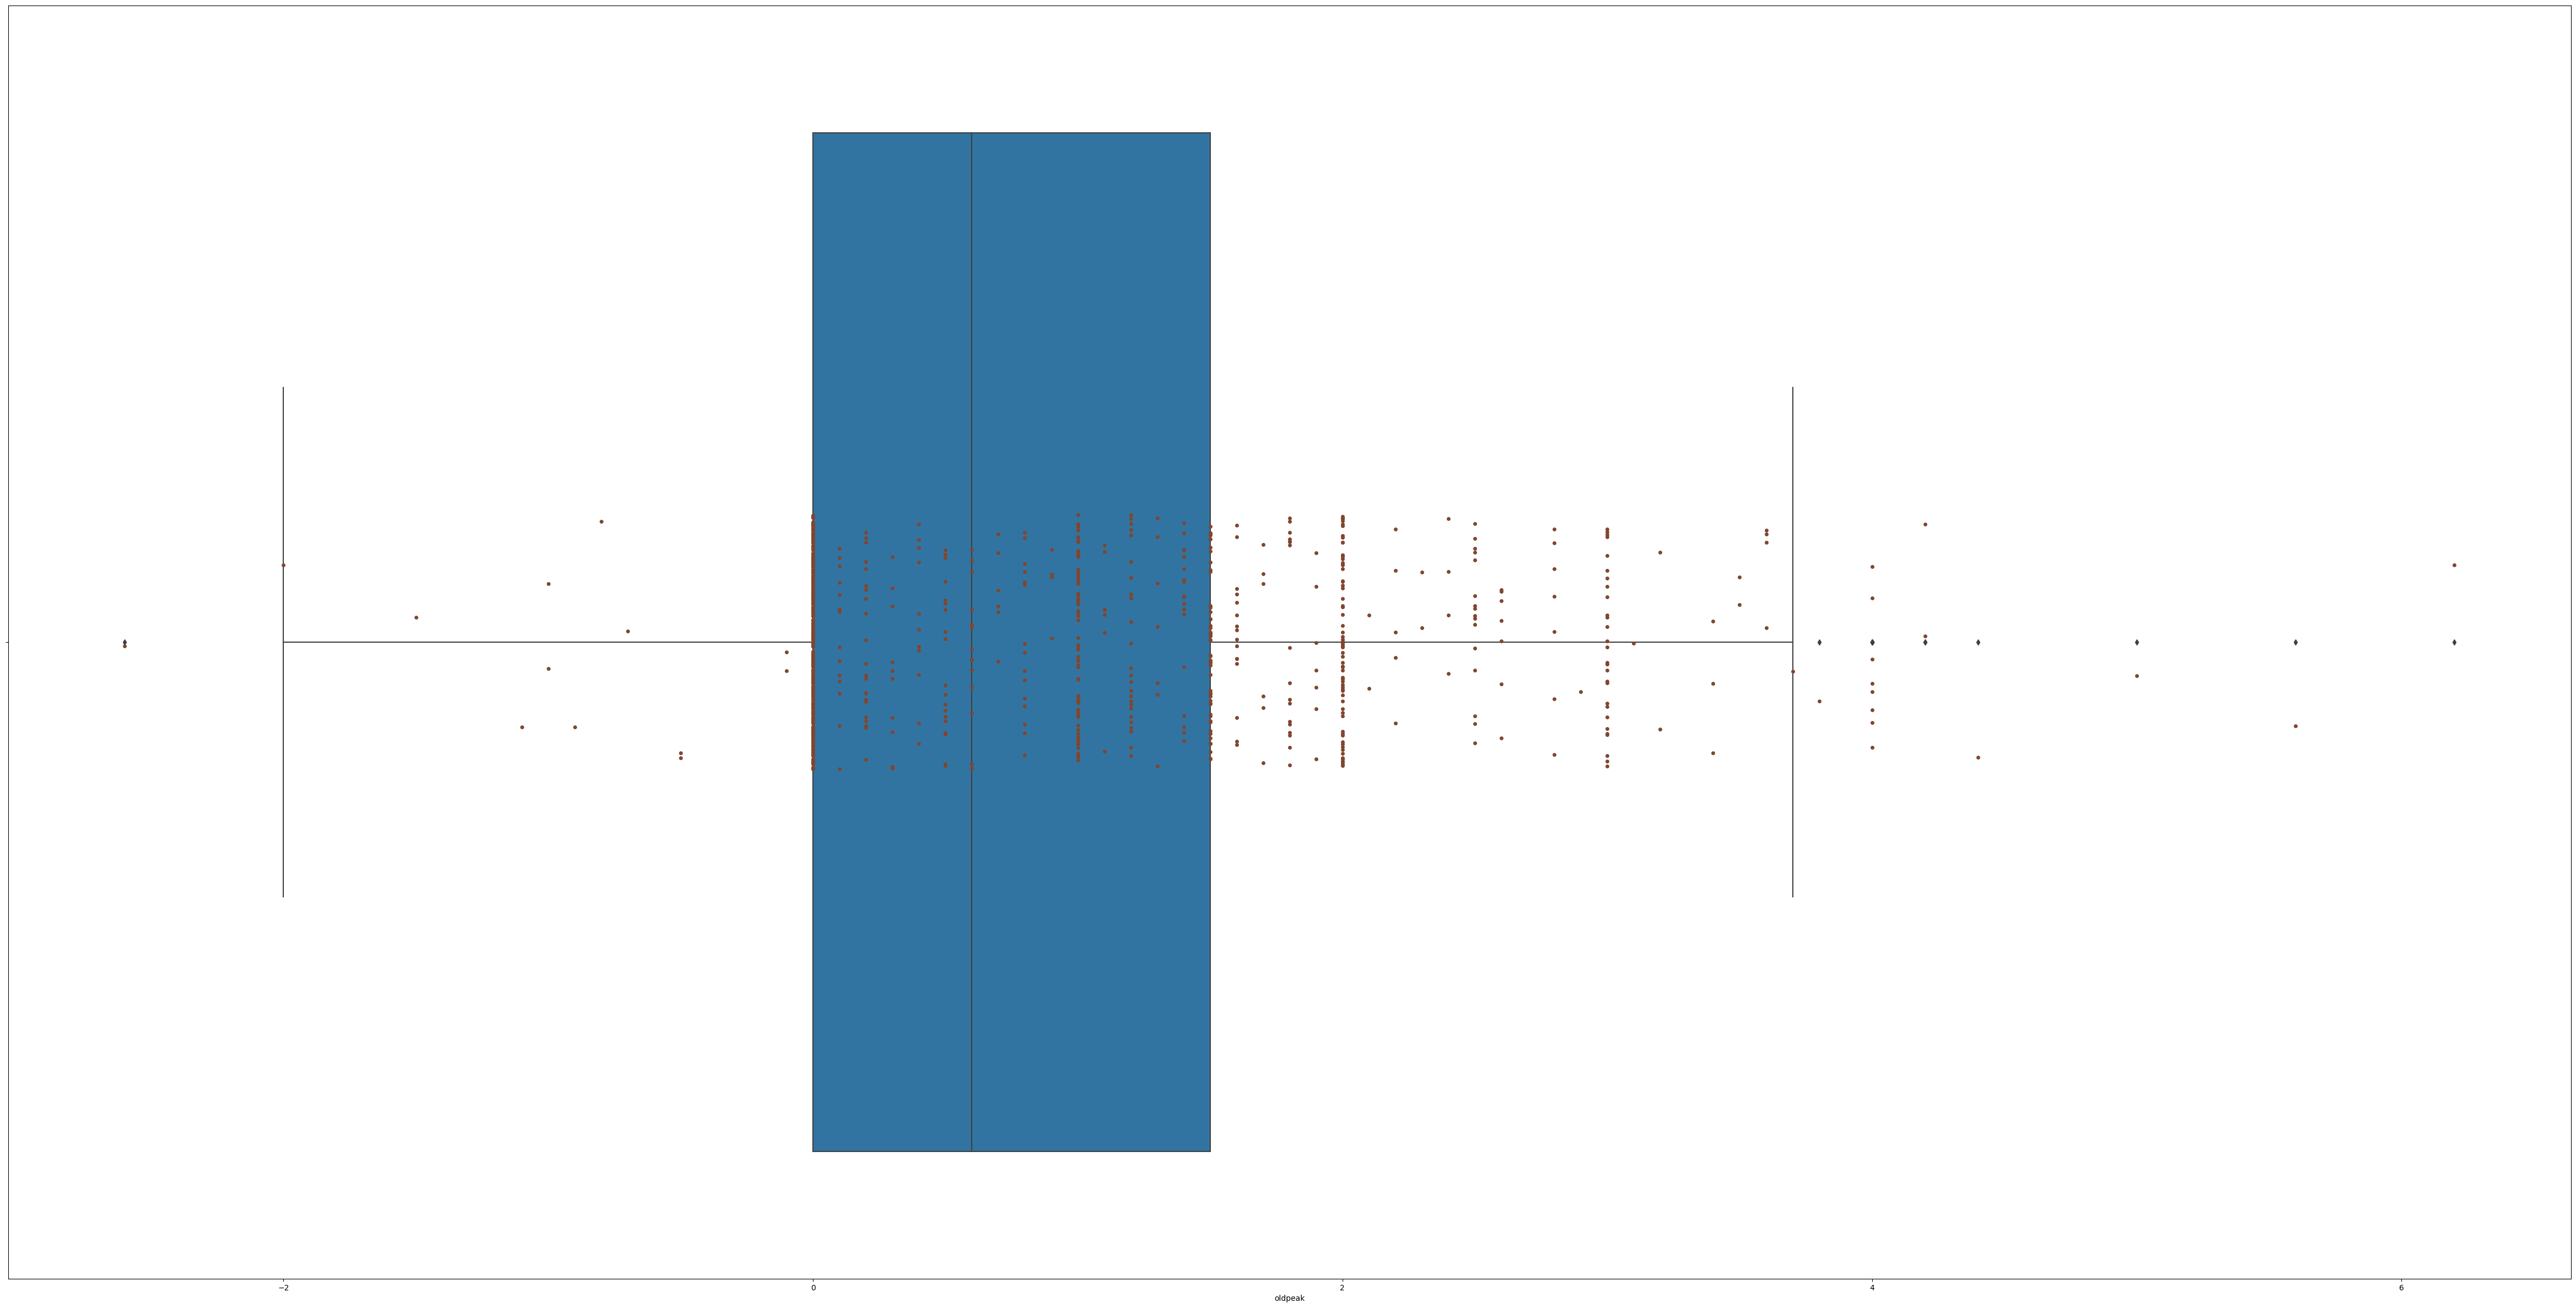

In [17]:
# cheaking the outliers in the feature 'oldpeak'
plt.figure(figsize = (60,30))
sns.boxplot(x='oldpeak', data=df)
sns.stripplot(x='oldpeak', data=df, color="#804630")

E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cholesterol'>

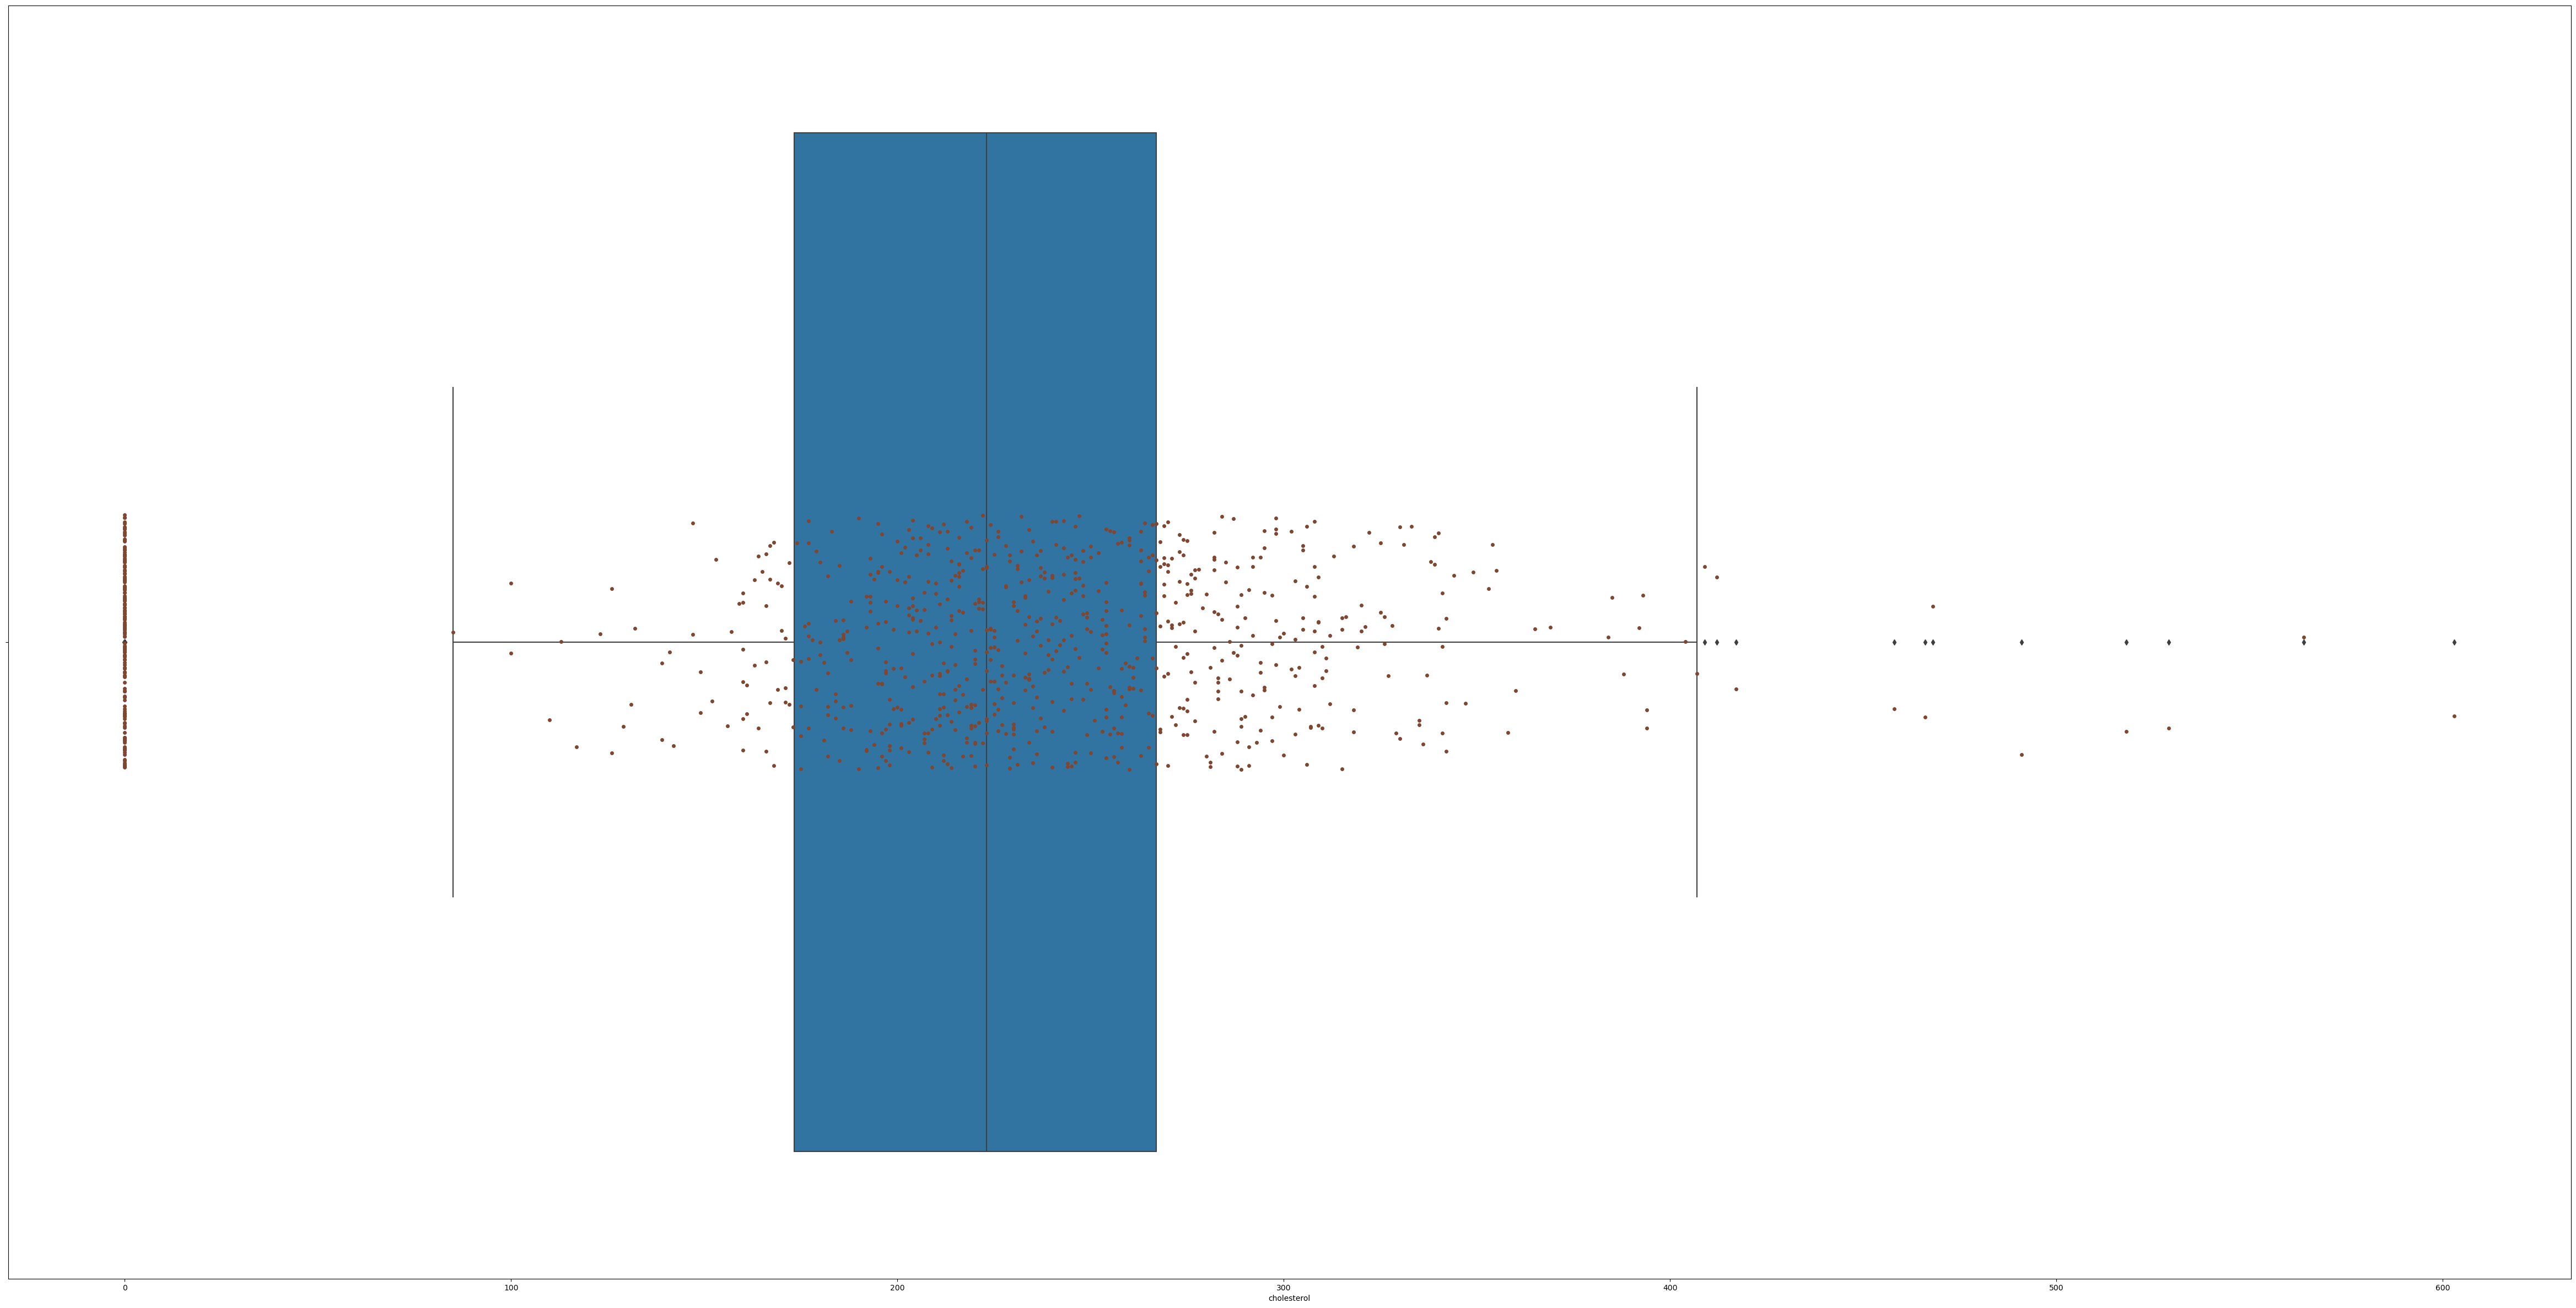

In [18]:
# cheaking the outliers in the feature 'cholesterol'
plt.figure(figsize = (60,30))
sns.boxplot(x='cholesterol', data=df)
sns.stripplot(x='cholesterol', data=df, color="#804630")

## data preprocessing

In [19]:
# we will apply IQR that can help us to remove the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,1,0
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1177,67,1,3,152,212,0,2,150,0,0.8,2,1
1179,44,1,4,120,169,0,0,144,1,2.8,3,1
1182,41,1,2,120,157,0,0,182,0,0.0,1,0
1187,57,1,4,130,131,0,0,115,1,1.2,2,1


E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='max heart rate'>

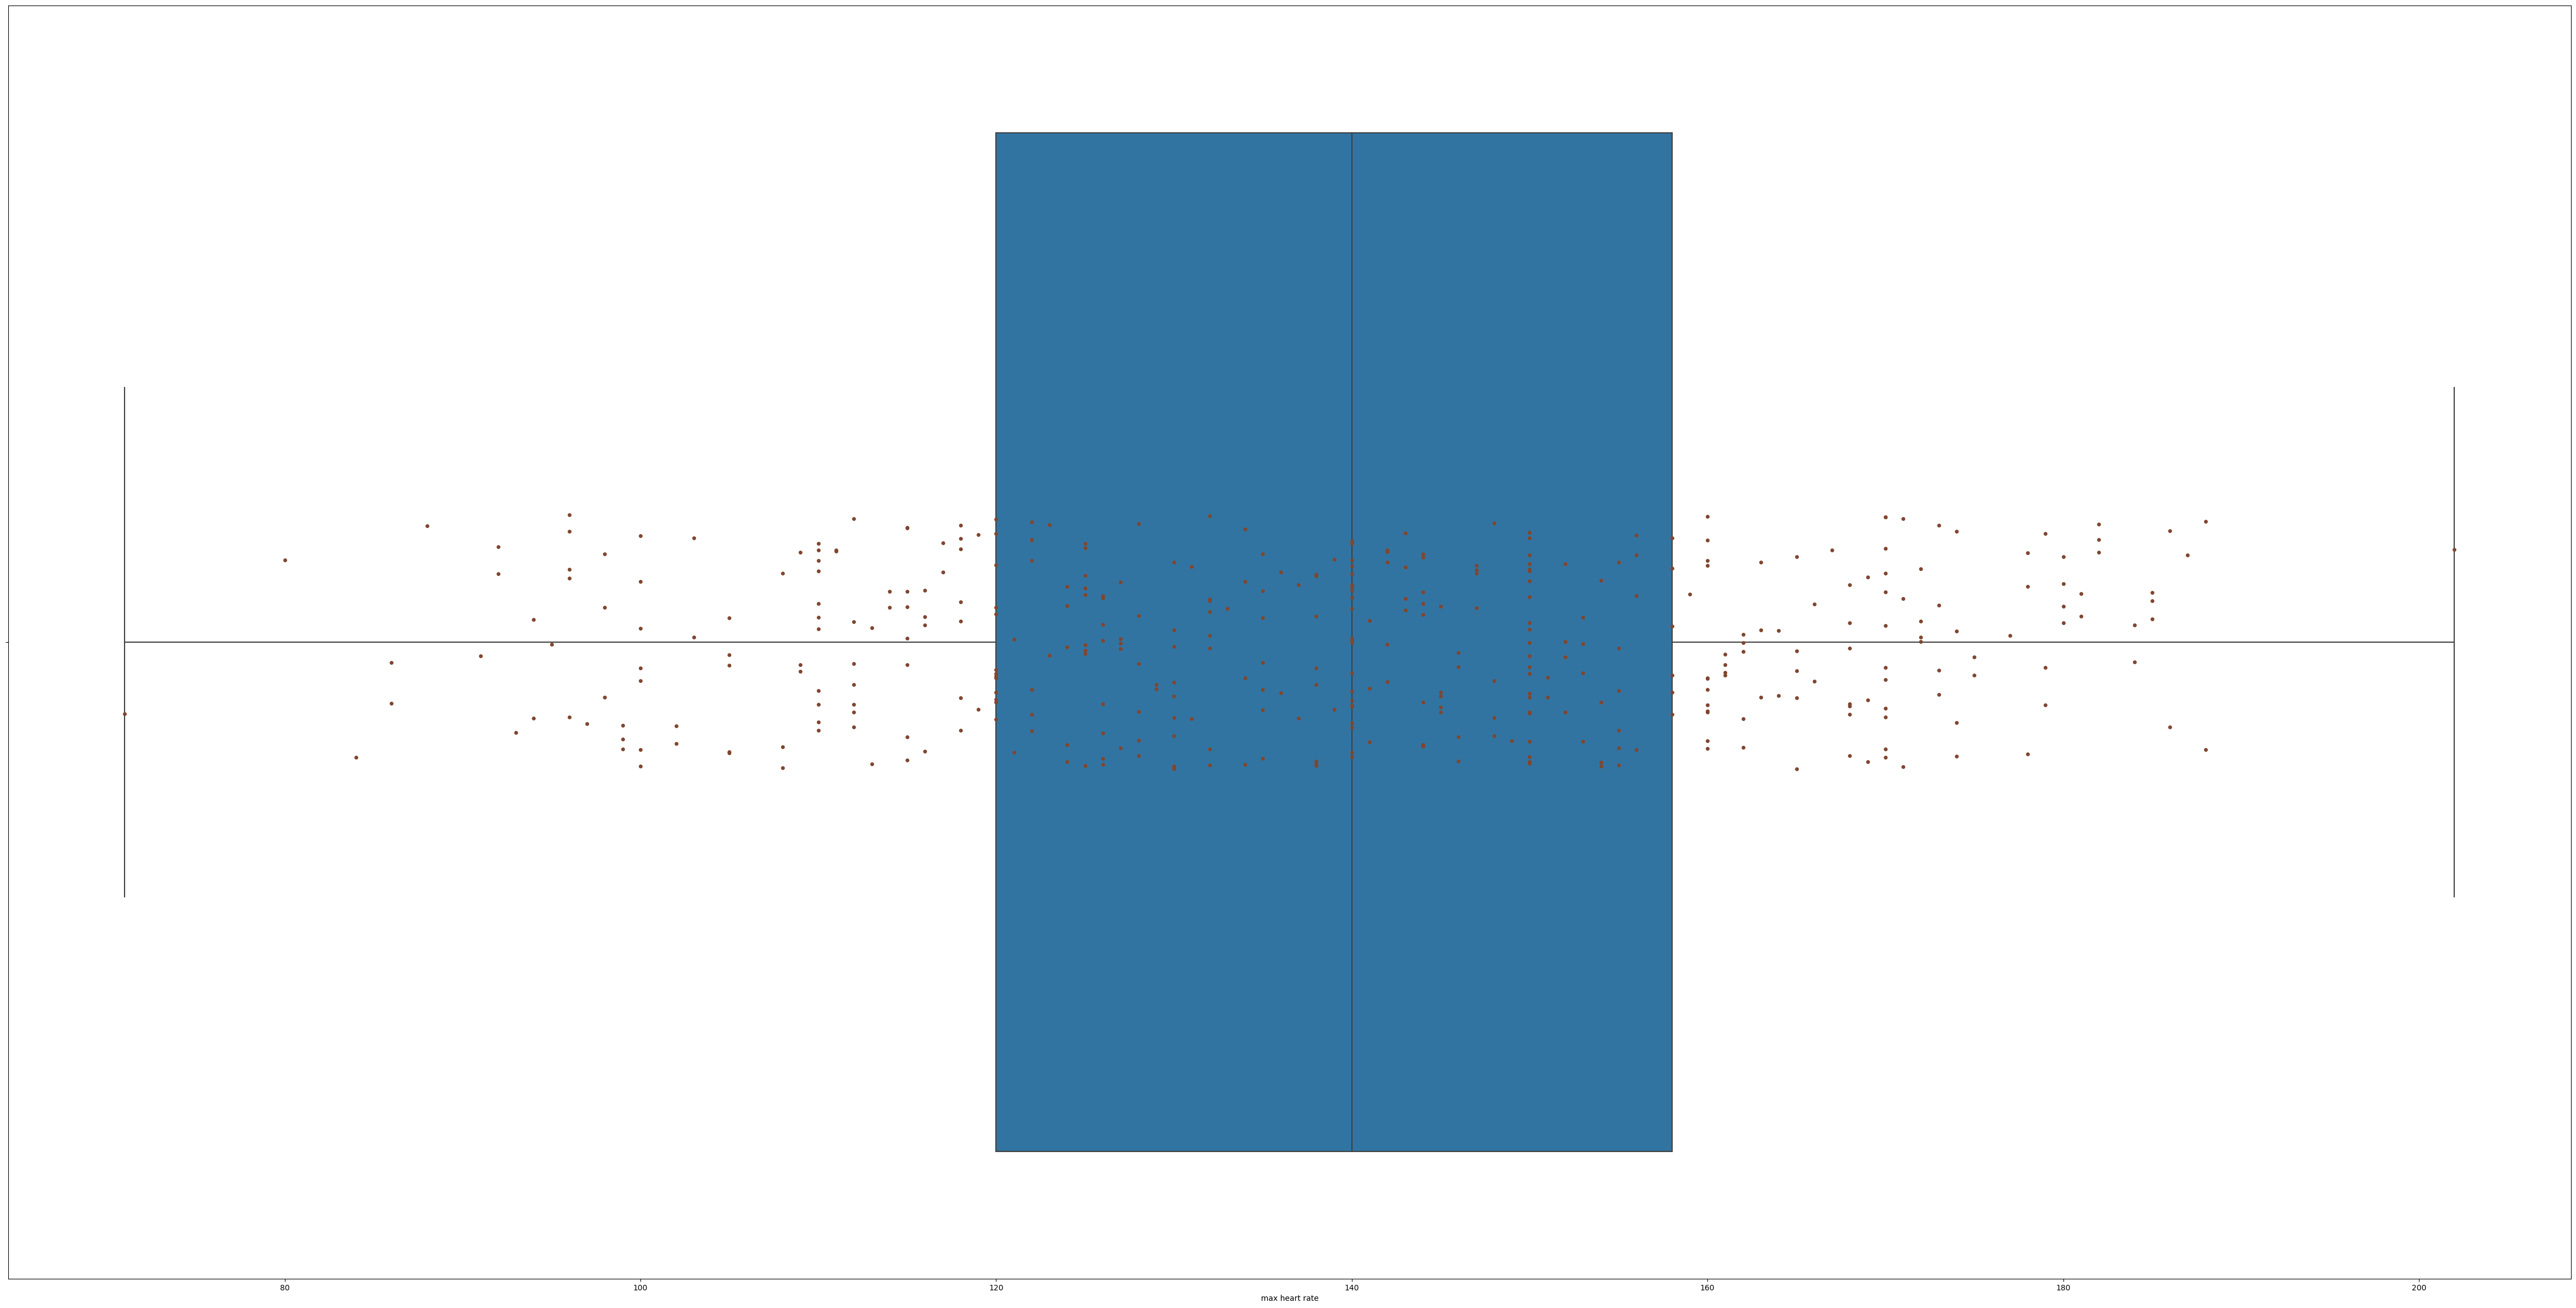

In [22]:
# cheaking the outliers in the feature 'max heart rate' after using IQR
plt.figure(figsize = (60,30))
sns.boxplot(x='max heart rate', data=df)
sns.stripplot(x='max heart rate', data=df, color="#804630")

E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='oldpeak'>

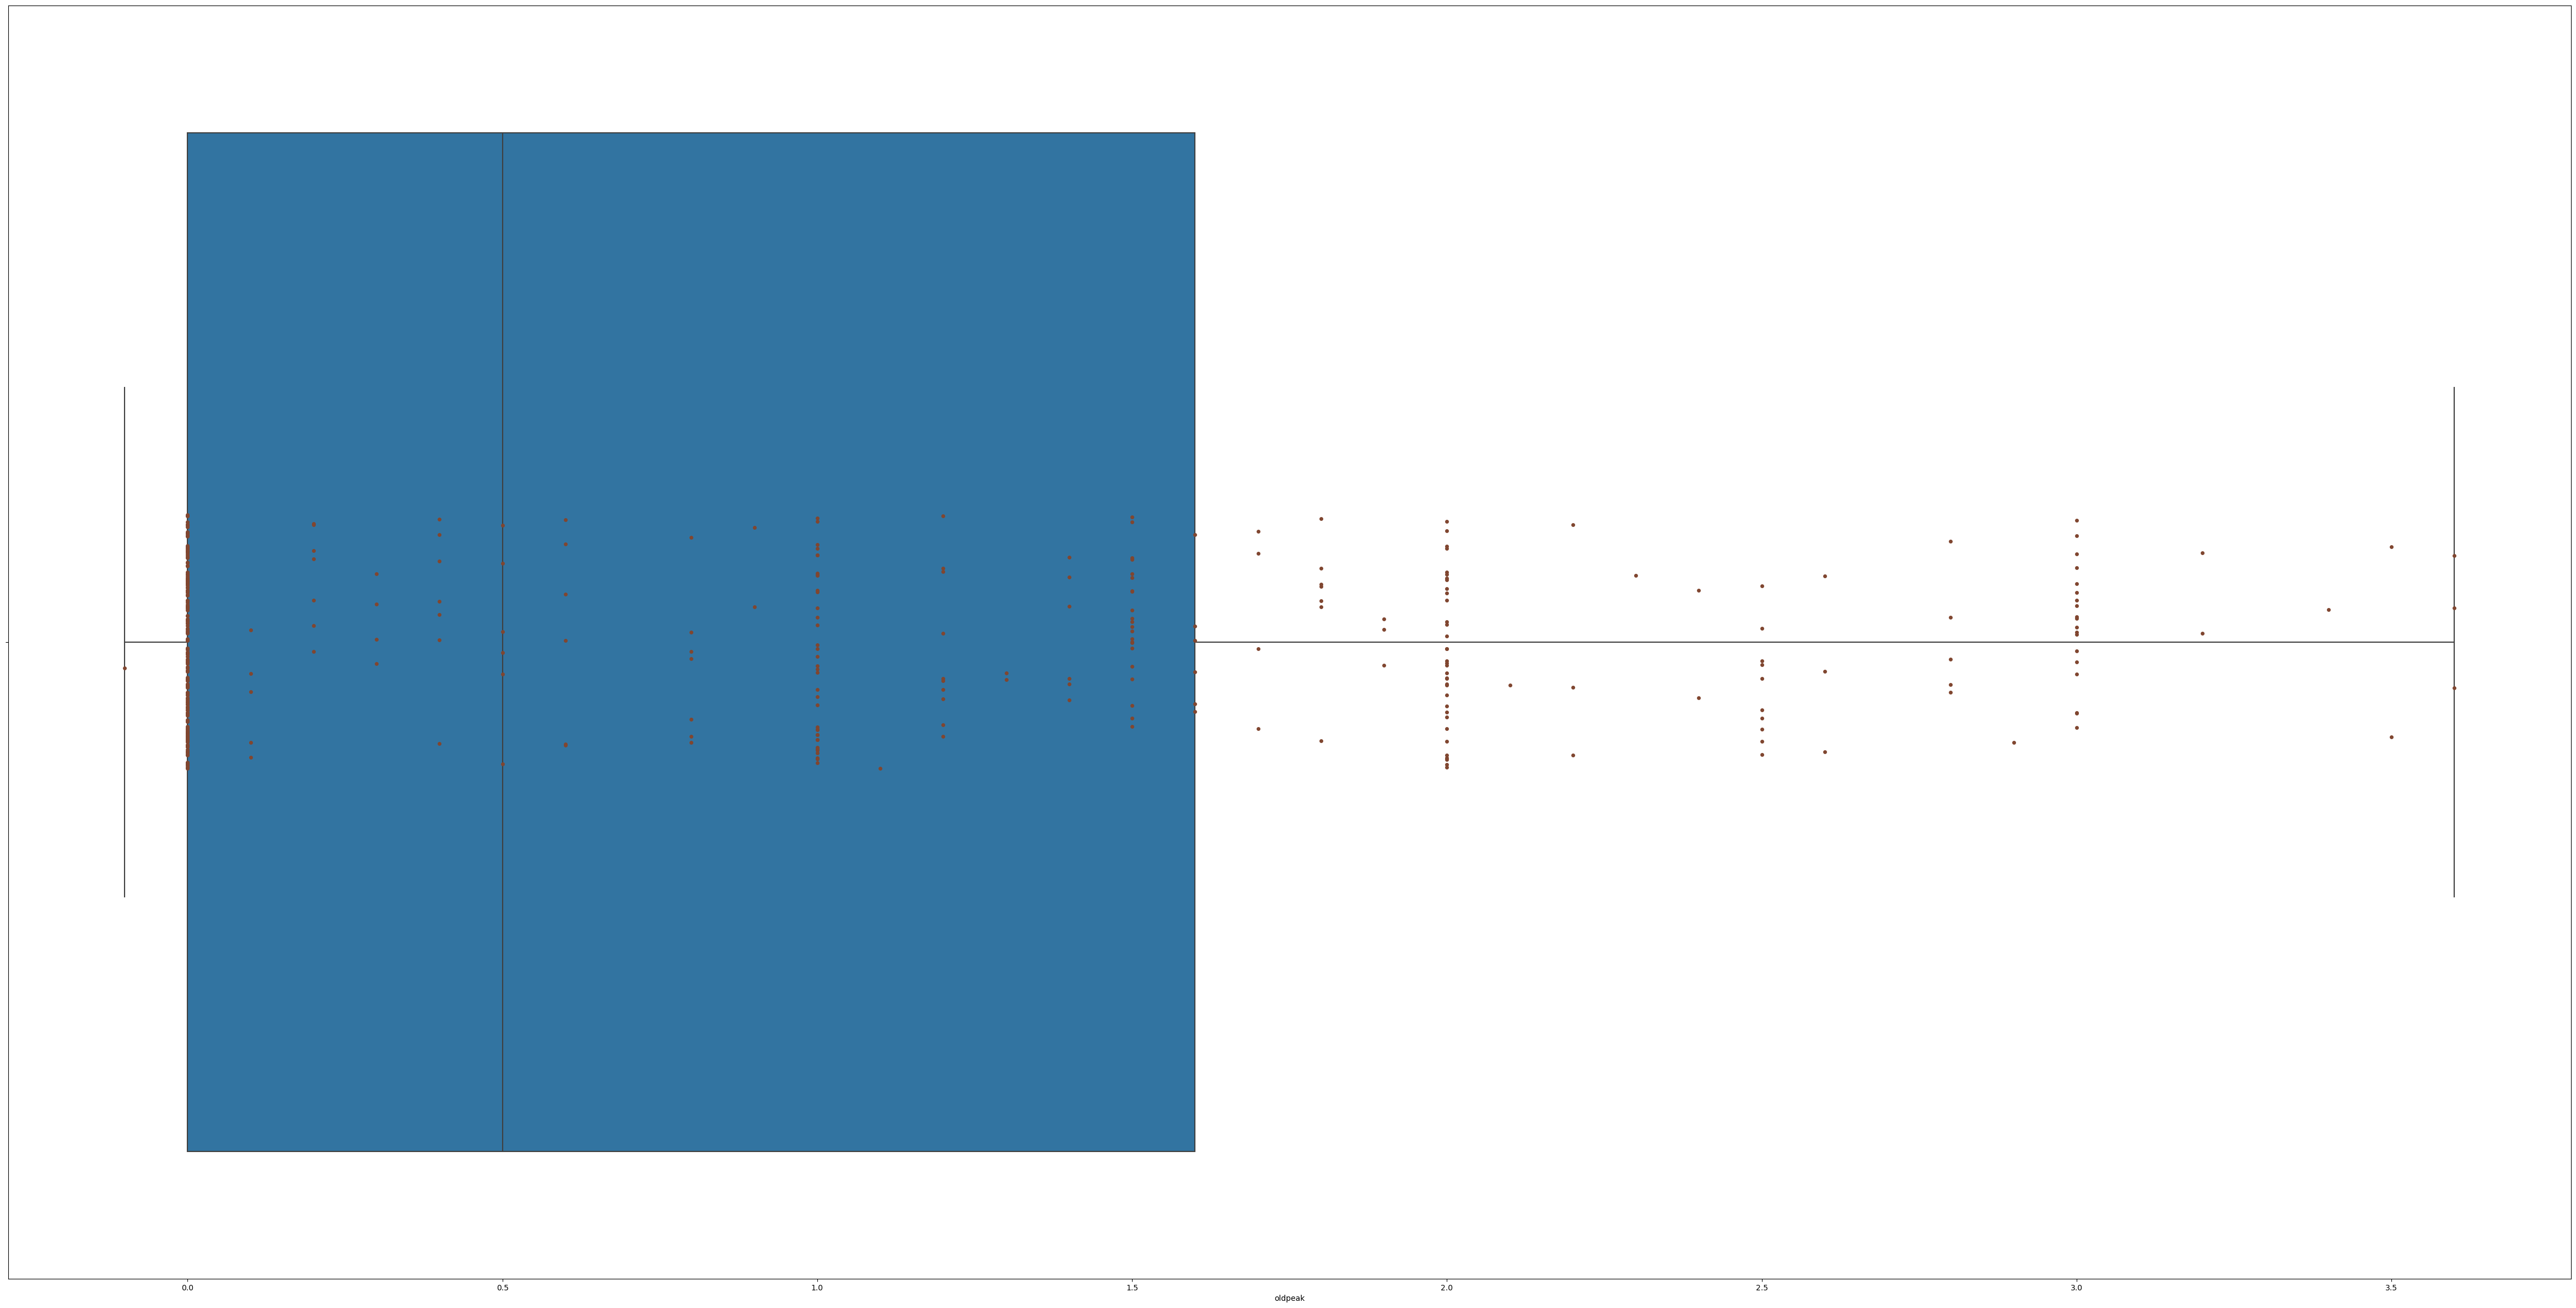

In [23]:
# cheaking the outliers in the feature 'oldpeak' after using IQR
plt.figure(figsize = (60,30))
sns.boxplot(x='oldpeak', data=df)
sns.stripplot(x='oldpeak', data=df, color="#804630")

E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\progs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cholesterol'>

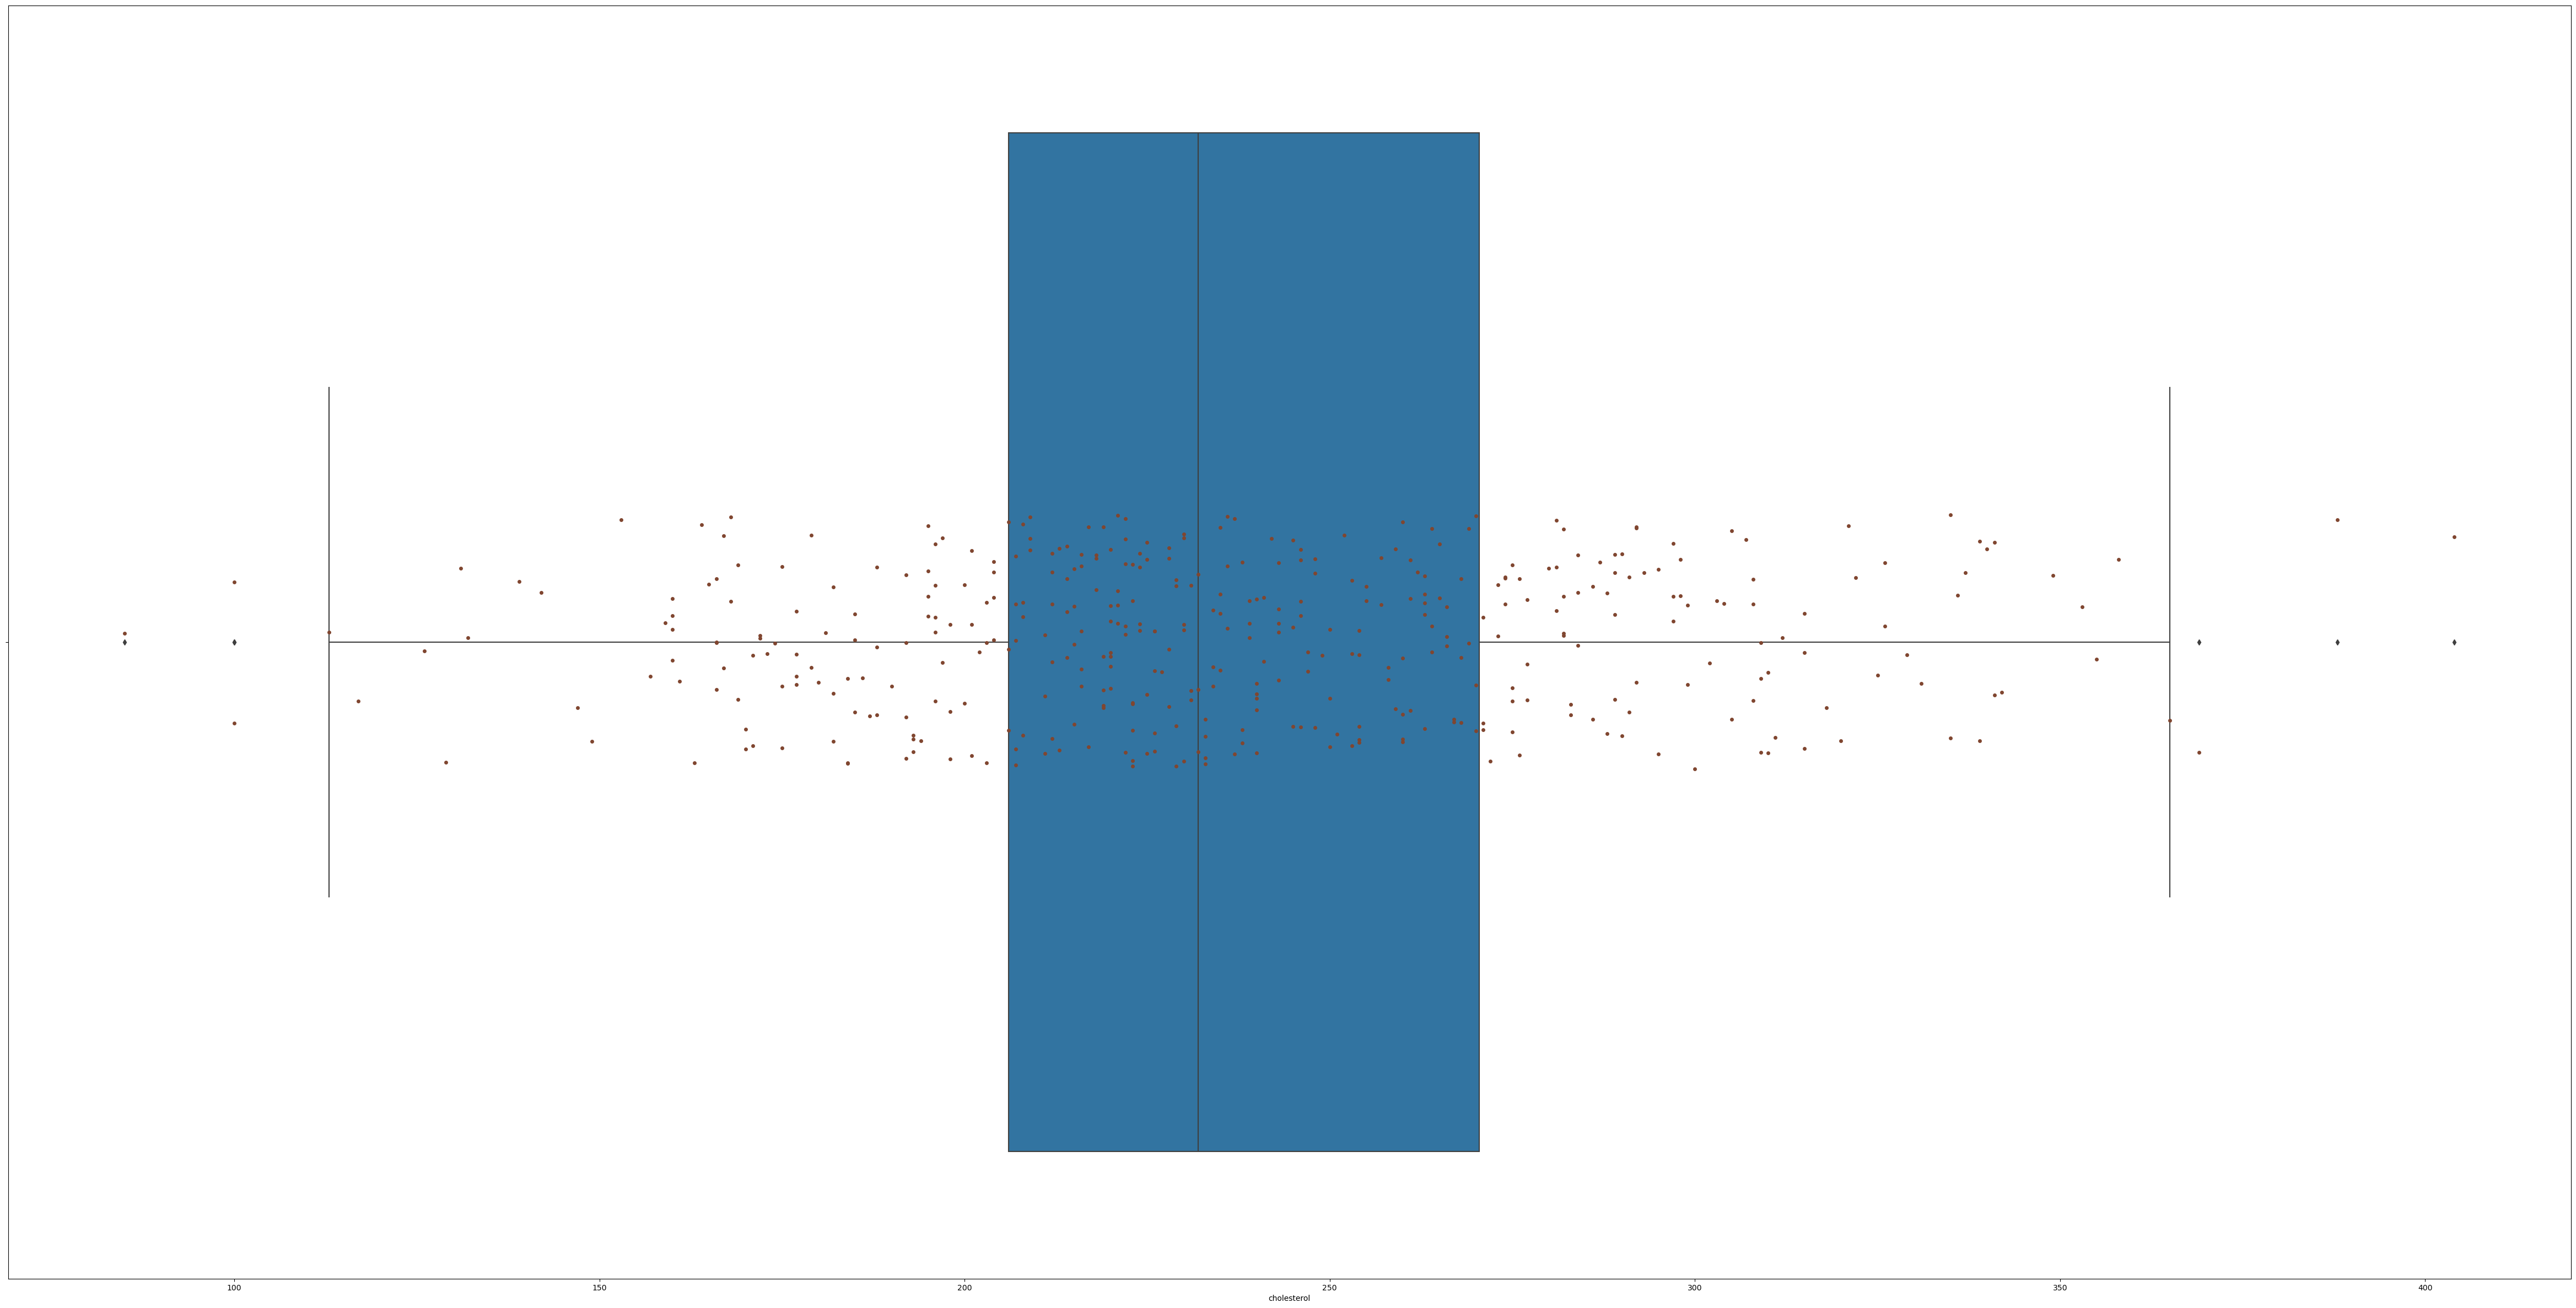

In [24]:
# cheaking the outliers in the feature 'cholesterol' after using IQR
plt.figure(figsize = (60,30))
sns.boxplot(x='cholesterol', data=df)
sns.stripplot(x='cholesterol', data=df, color="#804630")

In [25]:
# counting values of the target after using IQR
df['target'].value_counts()

target
1    217
0    198
Name: count, dtype: int64

In [38]:
# Decision Tree Classifier model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target variable
features = df.drop('target', axis=1)    # Features
target = df['target']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier with specified parameters
dt_classifier = DecisionTreeClassifier(random_state=45, criterion='gini', max_depth=2, min_samples_leaf=7)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt_classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test, y_pred))

[[40 19]
 [ 8 58]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        59
           1       0.75      0.88      0.81        66

    accuracy                           0.78       125
   macro avg       0.79      0.78      0.78       125
weighted avg       0.79      0.78      0.78       125



In [32]:
# using Gridsearch for best performancing Decision Tree Classifier model (OPTIMAIZATION)
from sklearn.model_selection import GridSearchCV
number = [5,11,13,41,42,101]
numbers = list(range(1, 31))
param_grid = {'random_state': number,
            'criterion': ['gini', 'entropy'],
            'min_samples_leaf': numbers,
            'max_depth': numbers} 
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'random_state': 5}

In [33]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=5)

In [34]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[47 12]
 [13 53]]


In [35]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        59
           1       0.82      0.80      0.81        66

    accuracy                           0.80       125
   macro avg       0.80      0.80      0.80       125
weighted avg       0.80      0.80      0.80       125

